In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely import wkt
import geopy
import utm

In [2]:
%matplotlib inline

In [3]:
file = 'boundaries/bdry_school_attendance_areas.gdb'
shp_df = gpd.read_file(file)

In [32]:
shp_df.columns

Index(['Shape_Length', 'Shape_Area', 'UNI_TYP', 'UNI_MAJ', 'UNI_NAM',
       'ELEM_NAME', 'MIDD_NAME', 'HIGH_NAME', 'geometry'],
      dtype='object')

In [5]:
grad_df = pd.read_csv("Resources/point_grad_rates.csv")

Index(['Unnamed: 0', 'UNI_TYP_left', 'UNI_MAJ_left', 'UNI_IMD', 'ORGID',
       'ORGID_NUM', 'SCHNAME', 'ADDRESS', 'CITY', 'ZIP', 'SCH_TYPE',
       'SCH_TYPE1', 'SCH_TYPE2', 'SCH_LEVEL', 'GRADE', 'CLASS', 'SDNUM',
       'SDNAME', 'CTYNUM', 'FIPSNUM', 'CTYNAME', 'MAGNET', 'DATE_ENTRY',
       'FED_SCHNUM', 'ALT_NAME', 'WEB_URL', 'YEAR', 'geometry', 'Unnamed: 0.1',
       'School Name', 'Demographic Description', 'Ending Status',
       'Four Year Percent', 'Four Year Total', 'Physical Line 1',
       'Physical City', 'Physical State', 'Physical Zip',
       'Consistent Attendance', 'index_right', 'SECSCHOOL', 'STATE',
       'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE',
       'UNI_MAJ_right', 'UNI_TYP_right', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME',
       'ELEM_NAME', 'POPULATION'],
      dtype='object')

In [6]:
grad_df['geometry'] = grad_df['geometry'].apply(wkt.loads)

In [7]:
grad_gdf = gpd.GeoDataFrame(grad_df, geometry='geometry')

In [8]:
grad_gdf.crs = {'init': 'epsg:26915'}

In [10]:
fileschool = "boundaries/school_programs/school_program_locations.shp"
schpg_df = gpd.read_file(fileschool)
schpg_df.crs = {'init': 'epsg:26915'}

https://gisdata.mn.gov/dataset/struc-school-program-locs

In [11]:
file = 'boundaries/my_neighborhood/my_neighborhood_sites.shp'
nbh_df = gpd.read_file(file)

https://gisdata.mn.gov/dataset/env-my-neighborhood

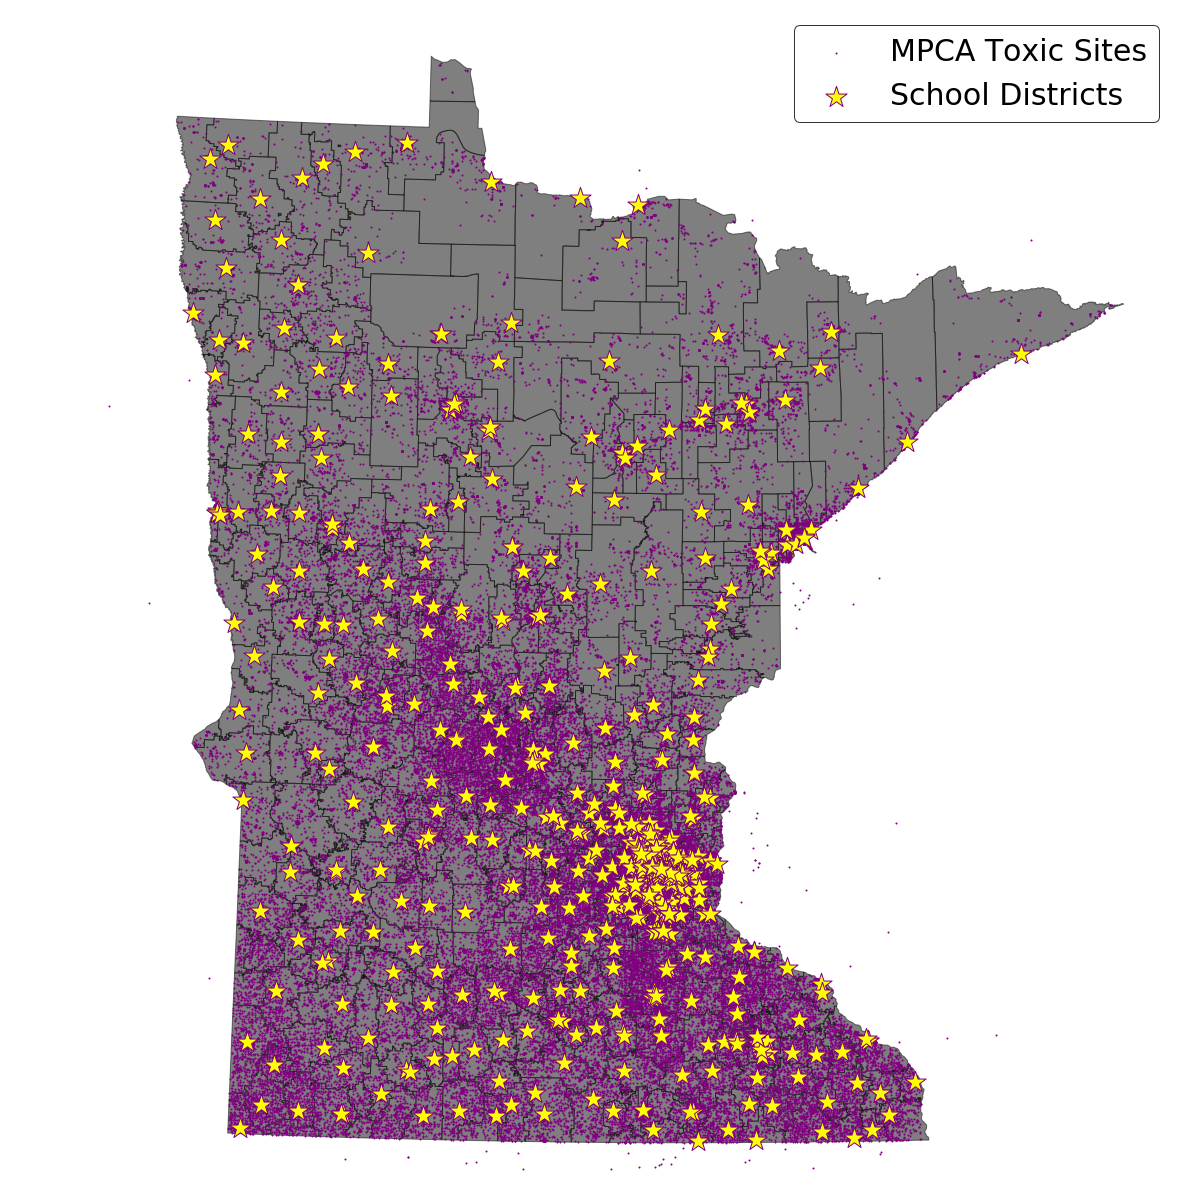

In [31]:
fig, ax = plt.subplots(1, figsize=(20,40))
base = shp_df.plot(ax=ax, alpha=0.5, color='black', edgecolor='k')
nbh_df.plot(ax=ax, marker="o", color="purple",markersize=1, label="MPCA Toxic Sites")
#schpg_df.plot(ax=base, marker="o", color="red",markersize=5, label="School Lunch Programs")
grad_gdf.plot(ax=ax, marker="*", color="yellow", edgecolor="purple", markersize=500, label="School Districts")
ax.set_ylim(4800000, 5500000)
legend = plt.legend(frameon = True, edgecolor= 'black', prop={'size': 30})
_ = ax.axis('off')
plt.savefig('toxic_lunch.png', bbox_inches='tight')

In [13]:
plt.savefig('toxic_lunch.png')

<Figure size 432x288 with 0 Axes>

In [23]:
grad_gdf.columns

Index(['Unnamed: 0', 'UNI_TYP_left', 'UNI_MAJ_left', 'UNI_IMD', 'ORGID',
       'ORGID_NUM', 'SCHNAME', 'ADDRESS', 'CITY', 'ZIP', 'SCH_TYPE',
       'SCH_TYPE1', 'SCH_TYPE2', 'SCH_LEVEL', 'GRADE', 'CLASS', 'SDNUM',
       'SDNAME', 'CTYNUM', 'FIPSNUM', 'CTYNAME', 'MAGNET', 'DATE_ENTRY',
       'FED_SCHNUM', 'ALT_NAME', 'WEB_URL', 'YEAR', 'geometry', 'Unnamed: 0.1',
       'School Name', 'Demographic Description', 'Ending Status',
       'Four Year Percent', 'Four Year Total', 'Physical Line 1',
       'Physical City', 'Physical State', 'Physical Zip',
       'Consistent Attendance', 'index_right', 'SECSCHOOL', 'STATE',
       'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE',
       'UNI_MAJ_right', 'UNI_TYP_right', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME',
       'ELEM_NAME', 'POPULATION'],
      dtype='object')

In [24]:
grad_gdf['Four Year Percent'].head()

0     90.00
1    100.00
2     95.65
3     98.04
4     87.50
Name: Four Year Percent, dtype: float64